Projekt A
Ray launcher w moim pokoju

Konrad Kotlarz 147974

Przyjmij rozmiar pokoju według proporcji tzw. złotego podziału, tzn. boki pokoju mają długość 𝑎, 𝑏,
gdzie (a+b)/a = a/b. Na środku krótszej ściany (o długości 𝑎) zamontowałeś punkt dostępowy transmitujący
dla częstotliwości 5 GHz. Przyjmij charakterystykę anteny nadawczej i odbiorczej jako dookólną o
zysku 1 (w skali liniowej). Minimalna wartość boku a to 12 m.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:

#parametry
a = 13 # krótsza ściana 
b = 21 # dłuższa ściana 
k = 2 # odległość anteny od krótszej ściany w metrach (stała)
hA = a/2 #wysokość anteny nadawczej i odbioczej od sciany b 
#er_ceil =  2.71 #wspolczynik odbicia od sufitu - plywood
#er_floor = 3.66 #wspolczynik odbicia od podlogi - floorboard
#er_wall =  2.73 #plasterboard
er_wall = 5.24#plasterboard
f = 5 *10**9 # czestotliowas fali radiowej w GHz
#display(f)
dmin = k #zakres odleglosci anten od  (do zadania 1 i 2)
dmax = b-k # zakres odleglosci anten do  (do zadania 1 i 2)
lp = 500#liczba punktow na wykresie
c = 299792458 #m/s


A.1
Wyznacz wykres tłumienia ścieżki dla odbiornika poruszającego się w osi pokoju (osi równoległej do
dłuższej ściany, przecinającej punkt położenia anteny)

In [ ]:
#code
lamb = c/f # obliczenie długości fali w próźni

zakres=dmax - dmin #zakres ruchu odbiornika w osi pokoju
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
d = np.arange(dmin, dmax, zakres/(lp-1),dtype=float) #wektor ruchu odbiornika
#'''''''''''''''''''''''''''''''''''''''''''''''''''''
PrPt = 1*1*((lamb/(4*np.pi*d))**2) #wzór Frissa na tłumienie ścieżki

PrPt= np.abs(PrPt) # obliczenie modółu
PrPt = 10*np.log10(PrPt) # zamiana na [dB]

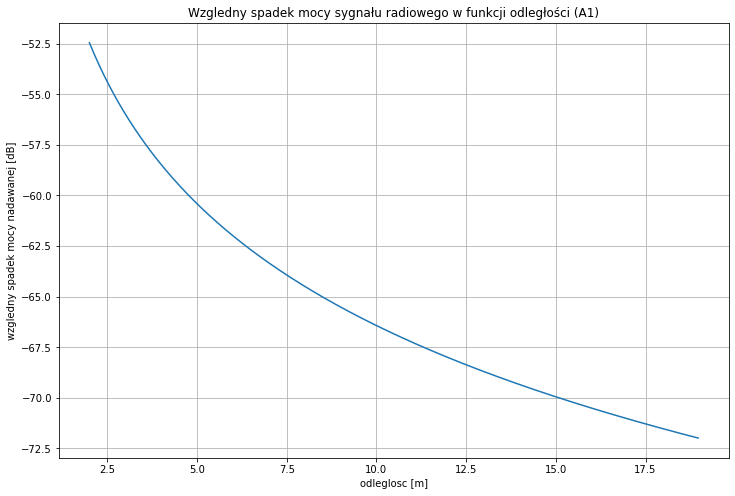

In [ ]:
#plot
plt.figure(figsize=(12,8)) # rozmiar okna wykresu
plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości (A1)")
plt.xlabel("odleglosc [m]")
plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
plt.plot(d,PrPt) # wykres
plt.grid()

A.2
Wyznacz wykres tłumienia ścieżki, gdy istnieją także ścieżki odbite:
* 1D – od przeciwległej ściany
* 2D – od przeciwległej ściany i bocznych ścian
* 2.5 D – od przeciwległej ściany, bocznych ścian, podłogi i sufitu.
Współczynniki odbicia przyjmij według normy P.2040, Przenikalność elektryczną materiałów
budowlanych przyjmij także według normy (rodzaj materiałów dobierz samodzielnie).

In [ ]:
#1D code
ReTM = (er_wall*np.cos(0) - np.sqrt(er_wall - (np.sin(0)**2)))/(er_wall*np.cos(0) + np.sqrt(er_wall- (np.sin(0)**2))) # obliczenie współczynika odbicia od ściany
a_wall = ReTM

d0=np.arange(dmin, dmax+k, zakres/(lp-1),dtype=float) # nowy wektor ruchu odbiornika po całej długości ściany b

fi1 = np.pi*(-2)*d0/c #faza bez odbicia 
fi2 = np.pi*(-2)*(2*b-d0)/c # faza z odbiciem od przeciwległej ściany

np.seterr(divide='ignore', invalid='ignore') #usuwa błędy związane z dzieleniem przez zero

# dalsze wyznaczenie fazy

e1=np.exp(1j*fi1)
e2=np.exp(1j*fi2)

PrPt1 = np.abs((1/d0*e1 + a_wall/(2*b-d0)*e2)) # wyznaczenie tłumienie ścieżki przy dwudrogowości
PrPt1 = 20*np.log10(PrPt1) # tłumienie wyrażone w [dB]

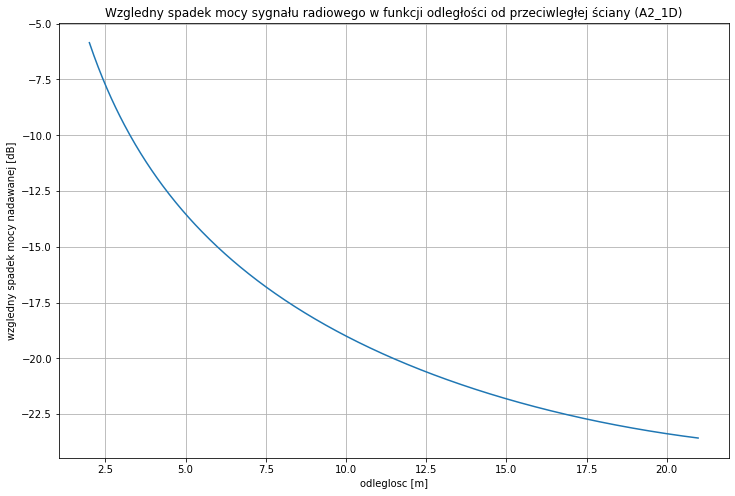

In [ ]:
#plot 1D
plt.figure(figsize=(12,8))
plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości od przeciwległej ściany (A2_1D)")
plt.xlabel("odleglosc [m]")
plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
plt.plot(d0,PrPt1)
plt.grid()


In [ ]:
#PARAMETRY
er_wall1 = 5.24#plasterboard
er_wall2 = 2.71#plywood 
er_wall3 = 1   #metal
# prawa i lewa sciana są z różnych materiałów i przeciwległa też
# cztery ścieżki bezpśrednio ,od przeciwległej ściany, od dwóch bocznych scian
d0=np.arange(dmin, dmax+k, zakres/(lp-1),dtype=float) #wektor do poruszania odbiornikiem

h1 = a*np.ones(len(d0)) #wektor odbiciaq od przeciwległej ściany
h2 = b*np.ones(len(d0)) # wektor odbicia od bocznej ściany

d1=np.sqrt(np.power(h1,2)+(d0**2)/4)  # wektor ścieżki dla przeciwległej sciany
d2=np.sqrt(np.power(h2,2)+(d0**2)/4)  # wektor ścieżki dla bocznych ścian

sin_alp = d0/d2 # z tw. sinusów
cos_alp = np.sqrt(1-sin_alp**2)

ReTM1 = (er_wall1*cos_alp - np.sqrt(er_wall1 - (sin_alp**2)))/(er_wall1*cos_alp + np.sqrt(er_wall1- (sin_alp**2))) #kąt zależy od d0
ReTM2 = (er_wall2*cos_alp - np.sqrt(er_wall2 - (sin_alp**2)))/(er_wall2*cos_alp + np.sqrt(er_wall2- (sin_alp**2))) #kąt zależy od d0
ReTM3 = (er_wall3 - np.sqrt(er_wall3))/(er_wall3 + np.sqrt(er_wall3)) # przeciwległa ściana jest  z metalu i kat to 90 stopni

a_wall1 = ReTM1 #obliczenie współczynika odbicia od ściany
a_wall2 = ReTM2
a_wall3 = ReTM3

In [ ]:
#2D
#code
d2=2*np.sqrt(np.power(h2,2)+(d0**2)/4) # 

fi1 = np.pi*(-2)*f*d0/c #faza bez odbicia 
fi2 = np.pi*(-2)*f*(2*b-d1)/c # faza z odbiciem od przeciwległej ściany
fi3 = -2*np.pi*f*d2/c # faza odbicia od ściany bocznej plasterboard
fi4 = -2*np.pi*f*d2/c # faza odbicia od ściany bocznej plywood 

e1=np.exp(1j*fi1)
e2=np.exp(1j*fi2)
e3=np.exp(1j*fi3)
e4=np.exp(1j*fi3)
#print(d0)
PrPt2 = np.abs((1/d0*e1 + a_wall3/(2*b-d1)*e2 + a_wall1/d2*e3) + a_wall2/d2*e4)
PrPt2 = 20*np.log10(PrPt2)

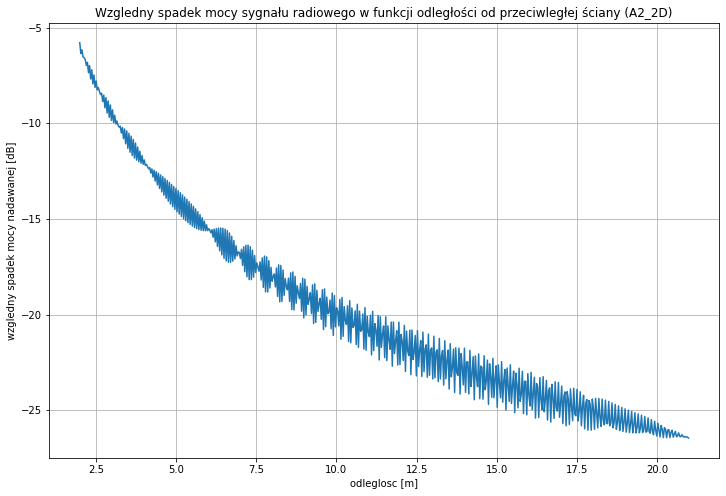

In [ ]:
#plot
plt.figure(figsize=(12,8))
plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości od przeciwległej ściany (A2_2D)")
plt.xlabel("odleglosc [m]")
plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
plt.plot(d0,PrPt2)
plt.grid()


A.3
Rozbudowałeś pokój o część o bokach 𝑏, 𝑎. Odbiornik porusza się w osi tej części
Wyznacz stratę dyfrakcji według metody Deygout. Przyjmij występowanie dyfrakcji wyłącznie, gdy
odbiornik nie ma bezpośredniej widoczności z nadajnikiem.
1D – wyznacz wartość straty dyfrakcji w osi dobudowanej części
2D, 2.5D – wyznacz wartość straty dyfrakcji w całej dobudowanej części

In [ ]:
#parametry A3
dmin = b
dmax = a+b

In [ ]:
#D1 code 
d= np.arange(dmin, dmax, zakres/(lp-1),dtype=float)

#DYFRAKCJA (ugięcie fali na krąwędzi)
 
S1=float(0)
S2=float(0)

S =  np.sqrt((b-1/2*a)**2+(d-1/2*a)**2) 

# tw. Cosinusów

r1 = np.sqrt((b-a)**2 + (1/2*a)**2) #stałe (przeciwprostokątna trójkąta r1)
r2 = np.sqrt((1/2*a)**2 + (a-d)**2)  # zmienia w zależności od d (przeciwprostokątna trójkąta r2)

alpha = np.arccos((r2**2 - r1**2 - S**2)/(-2*r1*S)) # wyznaczenie kata alpha

# Wyznaczanie straty dyfrakcji w osi dobudowanej pokoju (na rogu ściany)

h = r1*np.sin(alpha) # obliczenie wysokości trójkąta z tw.cosinusów
v = h*np.sqrt(2/lamb * S/(r1*r2))  #wyznaczenie v

# straty dyfrakcji
C = 6.9 + 20*np.log10(np.sqrt((v-0.1)**2 + 1) + v-0.1)

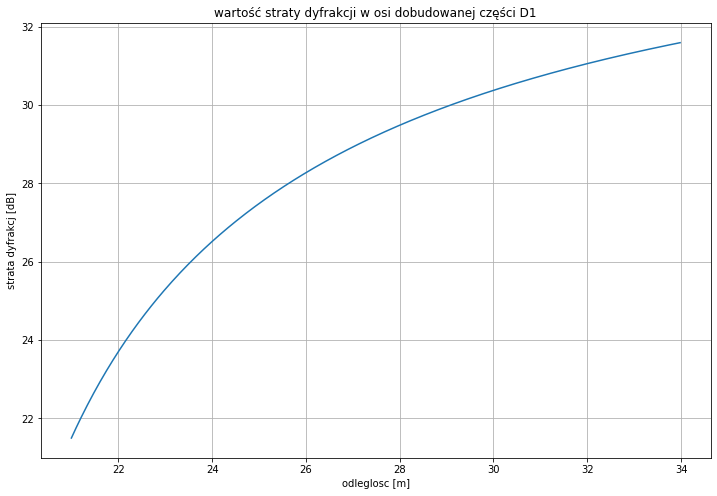

In [ ]:
# plot D1
plt.figure(figsize=(12,8))
plt.title("wartość straty dyfrakcji w osi dobudowanej części D1")
plt.xlabel("odleglosc [m]")
plt.ylabel("strata dyfrakcj [dB]")
plt.plot(d, C)
plt.grid()

A.4
Kolejna rozbudowa, tak, aby pokój stał się symetryczną podkową.
Wyznacz wartość tłumienia ścieżki dla trzech wariantów radiowych:
A.4.1
Sygnał przenika przez dwie ściany i dociera do odbiornika
A.4.2
Sygnał ulega podwójnej dyfrakcji, modelowanej tym razem według metody Berga
A.4.3
Sygnał ulega kilkukrotnym odbiciom wynikającym z zasad geometrii.Oczekiwana ocena:
Dst – Wariant 1D
Db – wariant 2D
Bdb – wariant 2.5 D

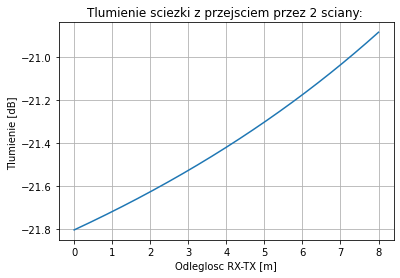

In [ ]:
# code A.4.1
d_min = 0
d_max = b-a
tlum_scian = 5 #(light wall)
zakres = d_max - d_min

d=np.arange(d_min, d_max, zakres/(lp-1),dtype=float)
#d1 = np.sqrt((a+b)**2 + d**2)
#tab_PL = []
#tab_odl = []

h1 = b*np.ones(len(d))
h2 = a*np.ones(len(d))
h3 = a*np.ones(len(d))
h4 = (b-d)*np.ones(len(d))


d1 = np.sqrt((1/2*a)**2 + h1**2)
d2 = np.sqrt((1/2*b)**2 + h2**2)
d3 = np.sqrt((1/2*b)**2 + h2**2)
d4 = np.sqrt((1/2*a)**2 + h4**2)



ReTM = (er_wall*np.cos(0) - np.sqrt(er_wall - (np.sin(0)**2)))/(er_wall*np.cos(0) + np.sqrt(er_wall- (np.sin(0)**2))) # obliczenie współczynika odbicia od ściany
a_wall = ReTM

fi1 = np.pi*(-2)*f*d1/c #faza bez odbicia 
fi2 = np.pi*(-2)*f*d2/c # faza z odbiciem od przeciwległej ściany
fi3 = np.pi*(-2)*f*d3/c # faza odbicia od ściany bocznej plasterboard

e1=np.exp(1j*fi1)
e2=np.exp(1j*fi2)
e3=np.exp(1j*fi3)

PrPt4 = np.abs(a_wall/d1*e1 + a_wall/d2*e2 + a_wall/d3*e2 + a_wall/d4*e3)
PrPt4 = 20*np.log10(PrPt4)

plt.title('Sygnał ulega kilkukrotnym odbiciom wynikającym z zasad geometrii ')
plt.xlabel('Odleglosc RX-TX [m]')
plt.ylabel('Tlumienie [dB] ')
plt.plot(d, PrPt4)
plt.grid()

A.5 Kreatywność jest w cenie! Rozwiń powyższy program według własnego pomysłu. Możesz dodać
odbicie od innego budynku (sygnał wychodzi i wraca prze okno), obudować ściany metalem, dodać
rozproszenie sygnału, policzyć wartości w przypadku wystąpienia deszczu monsunowego w pokoju,
etc…

A.6 (niezależne wobec części A.1-A.5)
Przyjmij układ budynków według siatki Manhattan. Dla wylosowanego rozkładem jednostajnym
położenia nadajnika, wyznacz wartość tłumienia ścieżki (w wariancie 2D, dla stałej wysokości
położenia odbiornika - według wybranego modelu propagacyjnego O2O:
Dst – mmMagic
Db – Winner II Model Urban Macro
Bdb – Winner II Model Urban Micro

    alpha (float) – przeźroczystość
    clip_box (bool) – włącz/wyłącz obramowanie
    clip_path (instancja Path) – ścieżka przecięcią z „Path”
    color lub c (kolor dostępny w matplotlib) – zmiana koloru
    contains (metoda testowania trafień) – funkcja oceniająca, czy wartości są w danym obrębie
    dash_capstyle ([’butt’ | ’round’ | 'projecting’]) – styl zakończeń dla linii przerywanych
    dash_joinstyle ([’miter’ | ’round’ | 'bevel’]) – styl zgięć wykresu dla linii przerywanych
    dashes (on/off) – efekt rozlanego tuszu
    label (string) – etykieta wyświetlana w legendzie
    linestyle or ls ([ ’-’ | ’–’ | ’-.’ | ’:’ | 'steps’ | …]) – styl wyświetlanej linii
    linewidth or lw (float) – szerokość linii
    marker ([ '+’ | ’,’ | ’.’ | '1′ | '2′ | '3′ | '4′ ]) – znacznik linii.
    markeredgecolor (kolor dostępny w matplotlib) – kolor krawędzi znacznika
    markeredgewidth or mew (float) – grubość krawędzi znacznika
    pickr (line) – linia przecinająca wykres (domyślnie pionowa)
    pickradius (radius) – kont pod jakim ma przechodzi linia plicker
    solid_capstyle ([’miter’ | ’round’ | 'bevel’]) – styl zakończeń dla linii ciągłych
    solid_joinstyle (instancja matplotlib.transforms.Transform) – styl zgięć wykresu dla linii ciągłych
    visible (bool) – włącz/wyłącz wyświetlanie linii
    xdata (np.array) – tablica danych dla osi x
    ydata (np.array) – tablica danych dla osi y
    zorder (any number) – przy wielu liniach na jednym wykresie, ustawienie kolejności wyświetlania. Czym najniższe numery są generowane jako pierwsze